# База данных IKEA.

1. Скачайте этот набор данных IKEA.

2. Выполните исследовательский анализ для набора данных, включая описательную статистику и визуализации. Опишите результаты.

3. Основываясь на EDA и вашем здравом смысле, выберите две гипотезы, которые вы хотите проверить / проанализировать. Для каждой гипотезы перечислите нулевую гипотезу и другие возможные альтернативные гипотезы, разработайте тесты, чтобы различать их, и выполните их. Опишите результаты.

4. Обучите модель предсказывать цену на мебель.

-Укажите, какие столбцы не следует включать в модель ипочему. 
-Создайте конвейер перекрестной проверки для обучения и оценки модели, включая (при необходимости) такие шаги как,  вменение пропущенных значений и нормализация.
-Предложите методы повышения производительности модели. Опишите результаты.

In [42]:
#загружаю все необходимые библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [538]:
#загуржаю файл

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv')

    Следующий шаг - описательная статистикая
    Для оценки данных необходимо наличие NaN значений, посмотреть, какие есть типы данных, колонки, меры центральной тенденции

In [3]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [4]:
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [6]:
df.dtypes

Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [8]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [27]:
np.round(df.describe(),2)

,Unnamed: 0,item_id,price,depth,height,width
count,3694.00,3694.00,3694.00,2231.00,2706.00,3105.00
mean,1846.50,48632396.79,1078.21,54.38,101.68,104.47
std,1066.51,28887094.10,1374.65,29.96,61.10,71.13
min,0.00,58487.00,3.00,1.00,1.00,1.00
25%,923.25,20390574.00,180.90,38.00,67.00,60.00
50%,1846.50,49288078.00,544.70,47.00,83.00,80.00
75%,2769.75,70403572.75,1429.50,60.00,124.00,140.00
max,3693.00,99932615.00,9585.00,257.00,700.00,420.00


/Users/leox_50/miniconda3/envs/new_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

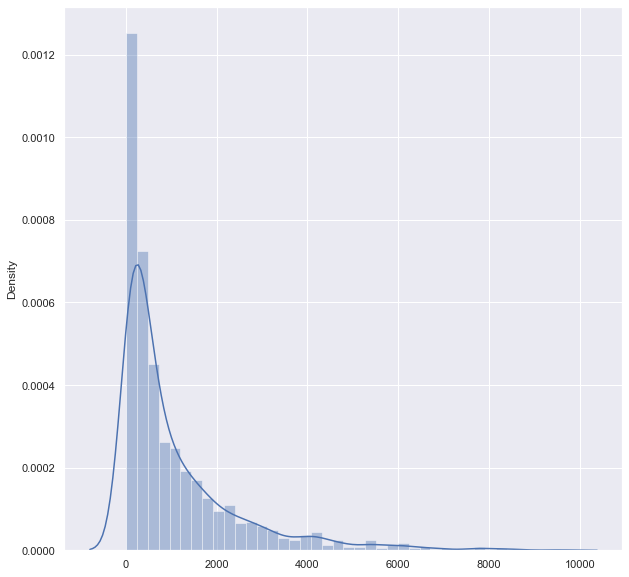

In [317]:
fg = plt.figure(figsize = (10,10))

sns.distplot(x = df['price'], bins = 40, kde = True)

# Построение гипотезы #1

    H0 - статистически значимой зависимости между ценой и возможностью купить товар онлайн не обнаружено (p > 0,05)

    H1 - есть статистически значимая зависимость между ценой и возмодностью купить товар (p < 0,05)

<AxesSubplot:xlabel='sellable_online', ylabel='price'>

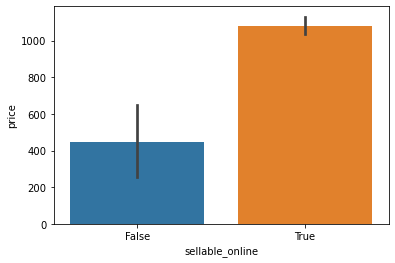

In [25]:
#сначала нужно оценить визуально есть ли вообще различие в диапазоне цен
#между присутствием возможность купить товар онлайн и с ее отсутствием

sns.barplot(x = 'sellable_online', y = 'price', data = df)

<AxesSubplot:xlabel='sellable_online', ylabel='price'>

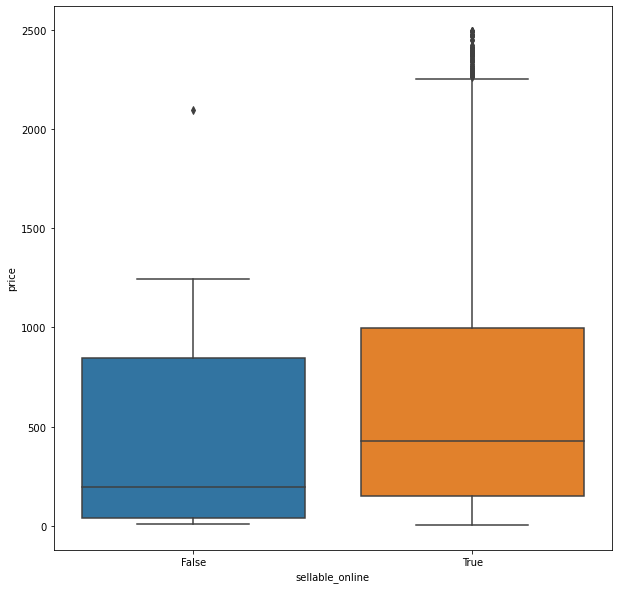

In [33]:
#оценим распределение при помощи боксплота
#заранее возьмем цену меньше 2500, чтобы избежать выбросов

fg = plt.figure(figsize = (10,10))

sns.boxplot(x = 'sellable_online', y = df[df['price']<2500].price, data = df)

<AxesSubplot:xlabel='sellable_online', ylabel='price'>

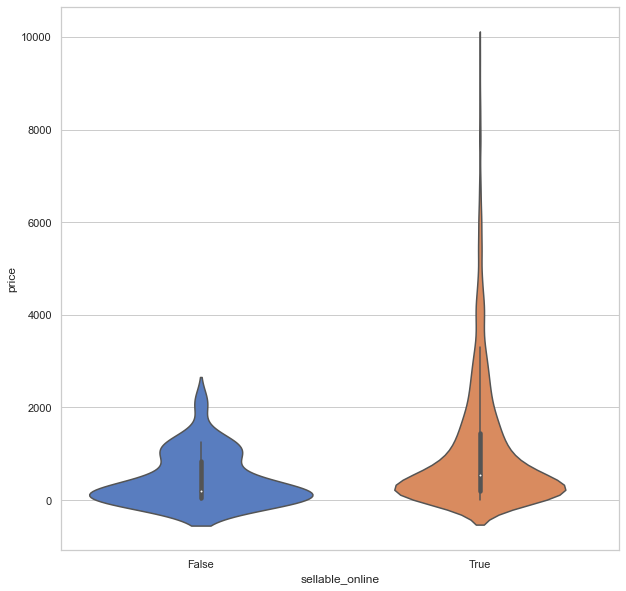

In [39]:
#более наглядный график распределения

fg = plt.figure(figsize = (10,10))
sns.set_theme(style="whitegrid", palette="muted")

sns.violinplot(x = 'sellable_online', y = 'price', data = df)

In [47]:
#подгружаем библиотеку для статистических исследований

from scipy import stats

The mean value if the product is not sellable online:  445.57
The mean value if the product is sellable online:  1083.04


/Users/leox_50/miniconda3/envs/new_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leox_50/miniconda3/envs/new_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


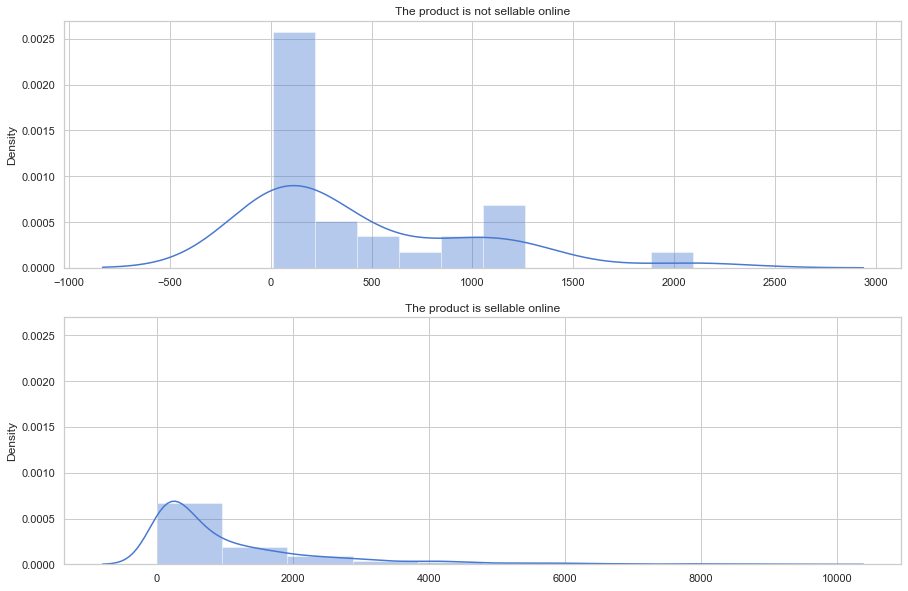

In [98]:
#проверям средние значения и распределения выборок
#так как мы видим разницу в срежних значениях - есть смысл
#провести тестирование с целью найти p-значение

fig, (ax1, ax2) = plt.subplots(2 ,1 , figsize=(15, 10), sharey=True)

sns.distplot(ax = ax1, x = df[df['sellable_online'] == False].price, bins = 10)
ax1.set_title('The product is not sellable online')
print('The mean value if the product is not sellable online: ', np.round(df[df['sellable_online'] == False].price.mean(),2))
sns.distplot(ax = ax2, x = df[df['sellable_online'] == True].price, bins = 10)
ax2.set_title('The product is sellable online')
print('The mean value if the product is sellable online: ', np.round(df[df['sellable_online'] == True].price.mean(),2))

для нахождения p-значения в этом случае нужно использовать t-test, так как наше распределение не нормальное

In [93]:
df_is_online = df[df['sellable_online'] == True].price

In [ ]:
df_not_online = df[df['sellable_online'] == False].price

In [112]:
 stats.ttest_ind(a = df_not_online,b = df_is_online)

Ttest_indResult(statistic=-2.446164909977735, pvalue=0.014484848977116303)

Вывод - так как p-значение меньше 0.05 - отклоняем нулевую гипотезу о равенстве средних значений

# Построение гипотезы #2

    H0 - статистически значимой зависимости между ценой и дизайнером не обнаружено (p > 0,05)

    H1 - есть статистически значимая зависимость между ценой и дизайнером (p < 0,05)

In [164]:
#группируем наши данные по признаку дизайнера

grouped_designer = df.groupby(['designer']).price.count()
grouped_designer

designer
002.756.74 Adjustable hinges allow you to adjust the door horizontally and vertically.Panel/glass doors provide dust-free storage and let you hide or display things according to your needs.Hinges included.Knobs included.Handle with care! A damaged edge or scratched surface can cause the glass to suddenly crack and/or break. Avoid collisions from the side - this is where the glass is most vulnerable.1 door will fit BILLY bookcase 40 cm and 2 doors will fit BILLY bookcase 80 cm.Can be used on the corner unit only if the shelf next to it has no doors.The door does not fit bookcases purchased in the spring of 2014 or earlier.     1
003.494.44 Separate shelf for magazines, etc. helps you keep your things organised and the table top clear.The castors make it easy to move the table if needed.                                                                                                                                                                                                   

в этой колонке есть данные, происхождение которых нам не известно и их нельзя отнести к классу дизайнеров

пример:

002.756.74 Adjustable hinges allow you to adjust the door horizontally and vertically.Panel/glass doors provide dust-free storage and let you hide or display things according to your needs.Hinges included.Knobs included.Handle with care! A damaged edge or scratched surface can cause the glass to suddenly crack and/or break. Avoid collisions from the side - this is where the glass is most vulnerable.1 door will fit BILLY bookcase 40 cm and 2 doors will fit BILLY bookcase 80 cm.Can be used on the corner unit only if the shelf next to it has no doors.The door does not fit bookcases purchased in the spring of 2014 or earlier. 

так как непонятно к какой группе их отнести - самым логичным решением есть удаление этих данных

In [297]:
#удаляем невалидные данные по признаку наличия цифер в названии

cleaned_designers = df.drop(df[df.designer.str.contains('\d')].index)
cleaned_designers

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


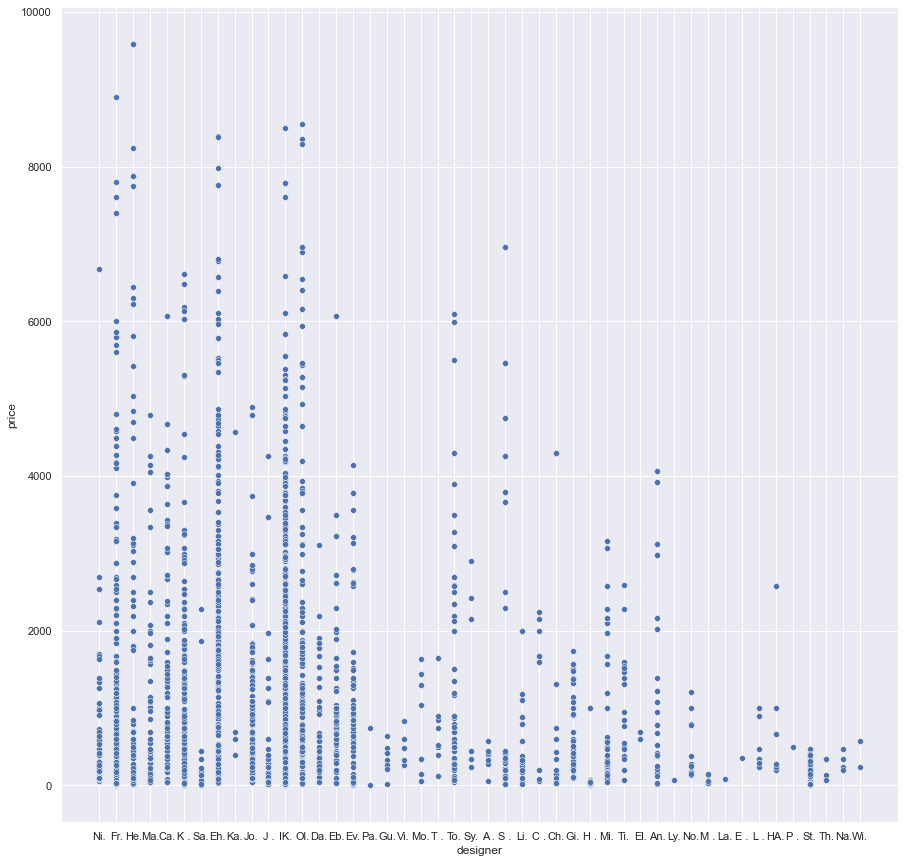

In [300]:
#смотрим на распределение цены по признаку дизайнера
#для удобства сократим значения колнки дизайнеров до 2 символов

fg = plt.figure(figsize = (15,15))

sns.scatterplot(x = cleaned_designers.designer.apply(lambda x: x[0:2] + '.'), y = cleaned_designers.price)
plt.show()

In [640]:
#находим средние значения по каждому дизайнеру для сравнения распределения с ГС

mean_designers = np.round(cleaned_designers.groupby(['designer']).price.mean(),2)

/Users/leox_50/miniconda3/envs/new_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of price mean values of designers')

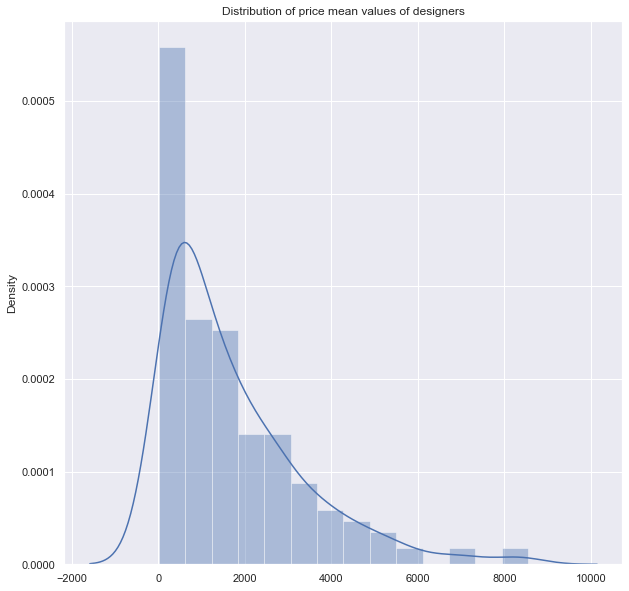

In [310]:
fg = plt.figure(figsize = (10,10))
sns.distplot(x = mean_designers).set_title('Distribution of price mean values of designers')

In [313]:
print(f'The mean value of all mean values of designers is {np.round(mean_designers.mean(),2)}', 
      f'The mean value of all prices is {np.round(df.price.mean(),2)}', sep='\n')

The mean value of all mean values of designers is 1715.87
The mean value of all prices is 1078.21


In [316]:
#проводим т-тестирование на наличие средних значений в ГС

stats.ttest_ind(a = mean_designers, b = df.price)

Ttest_indResult(statistic=7.364108733485736, pvalue=2.1569541375989786e-13)

Вывод - так как p-значение больше 0.05, нет оснований отклонить нулевую гипотезу об отстусвтии четкой зависимости между дизайнероми и ценой

# 4. Обучите модель предсказывать цену на мебель.

-Укажите, какие столбцы не следует включать в модель и почему. 

-Создайте конвейер перекрестной проверки для обучения и оценки модели, включая (при необходимости) такие шаги как,  вменение пропущенных значений и нормализация.

-Предложите методы повышения производительности модели. Опишите результаты.

#1. Укажите, какие столбцы не следует включать в модель и почему. 

Нам не стоит включать в нашу модель колонки: 0, item_id, name, link, short_description

Эти колонки не несут никакой познавательной информации и будут только ухудшать показатели модели.

Поэтому нам надо сформировать рабочий датафрейм

In [539]:
df_1 = df[['category','price','old_price','sellable_online','other_colors','designer','depth','height','width']]
df_1.head()

,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
0,Bar furniture,265.0,No old price,True,No,Nicholai Wiig Hansen,NaN,99.0,51.0
1,Bar furniture,995.0,No old price,False,No,Francis Cayouette,NaN,105.0,80.0
2,Bar furniture,2095.0,No old price,False,No,Francis Cayouette,NaN,NaN,NaN
3,Bar furniture,69.0,No old price,True,Yes,Henrik Preutz,50.0,100.0,60.0
4,Bar furniture,225.0,No old price,True,No,Marcus Arvonen,60.0,43.0,74.0


колонки depth height width
для того, чтобы включить их в модель нам надо понять, можно ли сохранить эти данные

можно заполнить пропуски средним значениями из category, которой принадлежит эта мебель

In [540]:
#заранее берем уже провалидированный датафрейм clean designers

df_grouped = cleaned_designers.groupby(['category']).transform(lambda x: x.fillna(x.mean()))
df_grouped

/var/folders/d9/t84rgvgn7mlgjns8r_0b_rgh0000gn/T/ipykernel_52890/3893978374.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df_grouped = cleaned_designers.groupby(['category']).transform(lambda x: x.fillna(x.mean()))
/var/folders/d9/t84rgvgn7mlgjns8r_0b_rgh0000gn/T/ipykernel_52890/3893978374.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df_grouped = cleaned_designers.groupby(['category']).transform(lambda x: x.fillna(x.mean()))
/var/folders/d9/t84rgvgn7mlgjns8r_0b_rgh0000gn/T/ipykernel_52890/3893978374.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will

,Unnamed: 0,item_id,price,sellable_online,depth,height,width
0,0,90420332,265.0,True,46.925926,99.000000,51.000000
1,1,368814,995.0,False,46.925926,105.000000,80.000000
2,2,9333523,2095.0,False,46.925926,97.571429,52.945946
3,3,80155205,69.0,True,50.000000,100.000000,60.000000
4,4,30180504,225.0,True,60.000000,43.000000,74.000000
...,...,...,...,...,...,...,...
3689,3689,99157902,750.0,True,50.000000,216.720379,91.000000
3690,3690,9158152,1572.0,True,50.000000,216.720379,135.000000
3691,3691,59157541,924.0,True,50.000000,216.720379,175.000000
3692,3692,89157573,2745.0,True,50.000000,216.720379,178.000000


In [541]:
df_2 = df[['Unnamed: 0','category','price','old_price','sellable_online','other_colors','designer']].merge(df_grouped[['Unnamed: 0', 'depth','height','width']],how='inner',on='Unnamed: 0')
df_2[['depth','height','width']] = df_2[['depth','height','width']].apply(lambda x: np.round(x,2))
df_2.sample(5)

,Unnamed: 0,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
167,172,Beds,2295.0,No old price,True,Yes,K Hagberg/M Hagberg,99.0,96.0,230.0
3488,3631,Wardrobes,1225.0,No old price,True,Yes,Ebba Strandmark/IKEA of Sweden,50.0,192.0,150.0
494,508,Bookcases & shelving units,695.0,No old price,True,Yes,Gillis Lundgren/IKEA of Sweden,30.0,202.0,80.0
3176,3305,TV & media furniture,990.0,No old price,True,Yes,IKEA of Sweden,40.0,38.0,180.0
710,737,Bookcases & shelving units,598.0,SR 776,True,No,Francis Cayouette/Eva Lilja Löwenhielm,41.0,199.0,132.0


In [321]:
'SR 820'.lstrip('SR ')

'820'

Следующий шаг - очистка поля old_price

In [367]:
#на данном примере видно - что поле старой цены может принимать разные значения,
#но они будут большими за нашу предыдущую цену

df_2.iloc[3546:3551,:]

,Unnamed: 0,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
3546,3689,Wardrobes,750.0,SR 820,True,No,Ehlén Johansson,50.0,216.72,91.0
3547,3690,Wardrobes,1572.0,"SR 1,755",True,No,Ehlén Johansson,50.0,216.72,135.0
3548,3691,Wardrobes,924.0,"SR 1,050",True,No,Ehlén Johansson,50.0,216.72,175.0
3549,3692,Wardrobes,2745.0,"SR 3,130",True,No,Ehlén Johansson,50.0,216.72,178.0
3550,3693,Wardrobes,1231.0,"SR 1,535",True,No,Ehlén Johansson,50.0,216.72,175.0


In [459]:
#нужно создать функцию перевода данных из обьектного значения в номинативное значения

def check_old_price(x):
    if x == 'No old price':
        return False
    elif '/' in x and 'SR ' in x:
        a = x.lstrip('SR ')
        b = a.rstrip(' pack')
        var_lst = b.split('/')
        x = float(var_lst[0]) / float(var_lst[1])
        return x
    elif '/' in x and 'SR ' not in x:
        x.strip(' pack')
        var_lst = x.split('/')
        x = float(var_lst[0]) / float(var_lst[1])
        return x
    else:
        x = float(x.lstrip('SR ').replace(',',''))
        return x

In [542]:
#применяем функцию

df_2['old_price'] = df_2['old_price'].apply(check_old_price)

In [461]:
df_2.sample(5)

,Unnamed: 0,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
1536,1608,Chests of drawers & drawer units,139.0,False,True,No,IKEA of Sweden,30.00,70.0,62.0
1535,1607,Chests of drawers & drawer units,555.0,False,True,Yes,IKEA of Sweden,48.00,78.0,160.0
99,101,Beds,480.0,800.0,True,No,Virgil Abloh,81.84,20.0,80.0
3439,3582,Wardrobes,5345.0,False,True,No,Ehlén Johansson/IKEA of Sweden,60.00,236.0,250.0
3047,3172,Tables & desks,439.0,False,True,No,Jomi Evers/IKEA of Sweden,52.54,74.0,60.0


In [543]:
#далее нам надо очистить значения No old price
#так как у нас нету этих значений - заменим это значение значением оригинальной цены

df_5 = df_2[df_2['old_price'] != False]

In [549]:
df_3 = df_2[df_2['old_price'] == False]
df_3['old_price'] = df_3['price']
df_3.sample(5)

/var/folders/d9/t84rgvgn7mlgjns8r_0b_rgh0000gn/T/ipykernel_52890/1267074341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['old_price'] = df_3['price']


,Unnamed: 0,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
506,521,Bookcases & shelving units,565.0,565.0,True,No,IKEA of Sweden,55.00,190.00,85.00
441,454,Bookcases & shelving units,45.0,45.0,True,No,Jon Karlsson,3.00,176.00,108.02
1336,1401,Chairs,2345.0,2345.0,True,No,Ehlén Johansson,60.92,77.22,66.47
3212,3344,TV & media furniture,1620.0,1620.0,True,Yes,IKEA of Sweden/Marcus Arvonen,42.00,192.00,120.00
2628,2744,Tables & desks,495.0,495.0,True,Yes,Carina Bengs,52.54,48.00,76.09


In [556]:
#путем конкатинации соеднияем два очищенных выше датафрейма

df_4 = pd.concat([df_3, df_5])
df_4.sample(5)

,Unnamed: 0,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
2201,2297,Sofas & armchairs,60.0,100.0,True,Yes,Mikael Axelsson,107.39,77.34,188.32
233,238,Beds,7765.0,7765.0,True,Yes,Ehlén Johansson/IKEA of Sweden,98.00,83.00,349.00
1696,1772,Children's furniture,195.0,195.0,True,No,S Holmbäck/U Nordentoft,53.00,76.73,53.00
1061,1109,Café furniture,345.0,345.0,True,Yes,Maja Ganszyniec,49.00,79.00,46.00
1494,1565,Chairs,1575.0,1575.0,True,No,Mia Lagerman/Ehlén Johansson,60.92,77.22,66.47


Следующий шаг - перевод полей в числовые значения

Таких колонок у нас две - sellable_online и other_colors

In [558]:
df_4['sellable_online'] = df_4['sellable_online'].apply(lambda x: 1 if x == True else 0)

In [560]:
df_4['other_colors'] = df_4['other_colors'].apply(lambda x: 0 if x == 'No' else 1)

In [561]:
df_4.sample(5)

,Unnamed: 0,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
2144,2236,Sofas & armchairs,3590.0,3590.0,1,1,Francis Cayouette/Ehlén Johansson,164.00,104.00,328.00
1869,1954,Outdoor furniture,3442.0,3442.0,1,1,IKEA of Sweden/K Hagberg/M Hagberg,68.46,75.48,87.91
1580,1652,Chests of drawers & drawer units,521.5,745.0,1,0,T Winkel/T Jacobsen,49.00,126.00,63.00
2433,2541,Sofas & armchairs,865.0,865.0,1,1,Ehlén Johansson,107.39,77.34,188.32
2549,2660,Tables & desks,295.0,295.0,1,0,Johan Kroon,52.54,46.00,46.00


Следующий шаг - перевод категориальных значений в дискриптивные

Таких колонок у нас две - category и designer
Для замены используем созданные ниже словари и заменим значения в даатфрейме

In [562]:
df_4.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [563]:
#создаем словарь для категорий

category_descriptor = dict()
value = 1

for category in df_4.category.unique():
    if category not in category_descriptor.values():
        category_descriptor[category] = value
        value += 1
    else:
        pass

In [485]:
category_descriptor

{'Bar furniture': 1,
 'Beds': 2,
 'Bookcases & shelving units': 3,
 'Cabinets & cupboards': 4,
 'Café furniture': 5,
 'Chairs': 6,
 'Chests of drawers & drawer units': 7,
 "Children's furniture": 8,
 'Nursery furniture': 9,
 'Outdoor furniture': 10,
 'Room dividers': 11,
 'Sideboards, buffets & console tables': 12,
 'Sofas & armchairs': 13,
 'Tables & desks': 14,
 'Trolleys': 15,
 'TV & media furniture': 16,
 'Wardrobes': 17}

In [564]:
df_4['category'] = df_4['category'].apply(lambda x: category_descriptor[x])
df_4.sample(5)

,Unnamed: 0,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
1507,1578,6,1395.0,1450.0,1,0,David Wahl/IKEA of Sweden/John/Jonas/Petrus/Pa...,60.92,75.0,78.0
699,724,3,195.0,195.0,1,1,IKEA of Sweden,40.00,128.0,60.0
1890,1976,10,465.0,465.0,1,0,Nike Karlsson,67.00,80.0,68.0
451,464,3,1710.0,1710.0,1,0,IKEA of Sweden,40.00,190.0,170.0
2014,2102,10,2412.0,2412.0,1,1,Jonas Hultqvist/IKEA of Sweden,82.00,84.0,223.0


In [565]:
#создаем словарь для дизайнеров

designer_descriptor = dict()
value = 1

for designer in df_4.designer.unique():
    if designer not in designer_descriptor.values():
        designer_descriptor[designer] = value
        value += 1
    else:
        pass

In [495]:
designer_descriptor

{'Nicholai Wiig Hansen': 1,
 'Francis Cayouette': 2,
 'Henrik Preutz': 3,
 'Marcus Arvonen': 4,
 'Carina Bengs': 5,
 'K Hagberg/M Hagberg': 6,
 'Sarah Fager': 7,
 'Nike Karlsson': 8,
 'Ehlén Johansson': 9,
 'Maja Ganszyniec': 10,
 'Karl Malmvall': 11,
 'John/Jonas/Petrus/Paul/Caroline': 12,
 'Nike Karlsson/Maja Ganszyniec': 13,
 'J Karlsson/N Karlsson': 14,
 'IKEA of Sweden/Karl Malmvall': 15,
 'IKEA of Sweden': 16,
 'Nike Karlsson/J Karlsson/N Karlsson': 17,
 'Ola Wihlborg': 18,
 'IKEA of Sweden/Ebba Strandmark': 19,
 'K Hagberg/M Hagberg/IKEA of Sweden': 20,
 'Jon Karlsson': 21,
 'IKEA of Sweden/Carina Bengs': 22,
 'David Wahl': 23,
 'Jon Karlsson/IKEA of Sweden': 24,
 'IKEA of Sweden/Paulin Machado': 25,
 'IKEA of Sweden/K Hagberg/M Hagberg': 26,
 'IKEA of Sweden/Eva Lilja Löwenhielm': 27,
 'IKEA of Sweden/David Wahl': 28,
 'Ebba Strandmark/IKEA of Sweden': 29,
 'Eva Lilja Löwenhielm': 30,
 'IKEA of Sweden/Anna Efverlund': 31,
 'Paulin Machado': 32,
 'IKEA of Sweden/Tina Christensen

In [566]:
df_4['designer'] = df_4['designer'].apply(lambda x: designer_descriptor[x])
df_4.sample(5)

,Unnamed: 0,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
2066,2154,10,75.0,75.0,1,0,16,68.46,75.48,87.91
1779,1859,9,395.0,395.0,1,0,16,43.66,53.00,66.00
1742,1818,8,175.0,175.0,1,0,53,50.00,50.00,90.00
3223,3356,16,125.0,125.0,1,1,16,40.00,38.00,60.00
430,441,3,1081.0,1180.0,1,1,16,40.00,192.00,120.00


# Построение модели

In [567]:
df_4['size'] = np.round(df_4[['depth', 'height', 'width']].product(axis=1),2)

In [568]:
df_6 = df_4[['category','price','sellable_online','other_colors','designer','size']]
df_6.sample(5)

,category,price,sellable_online,other_colors,designer,size
1350,6,2500.0,1,1,3,2252160.0
617,3,1035.0,1,0,16,1117600.0
3065,14,575.0,1,0,210,291597.0
665,3,1840.0,1,0,21,1435280.0
1084,6,395.0,1,0,91,266418.0


<Figure size 576x576 with 0 Axes>

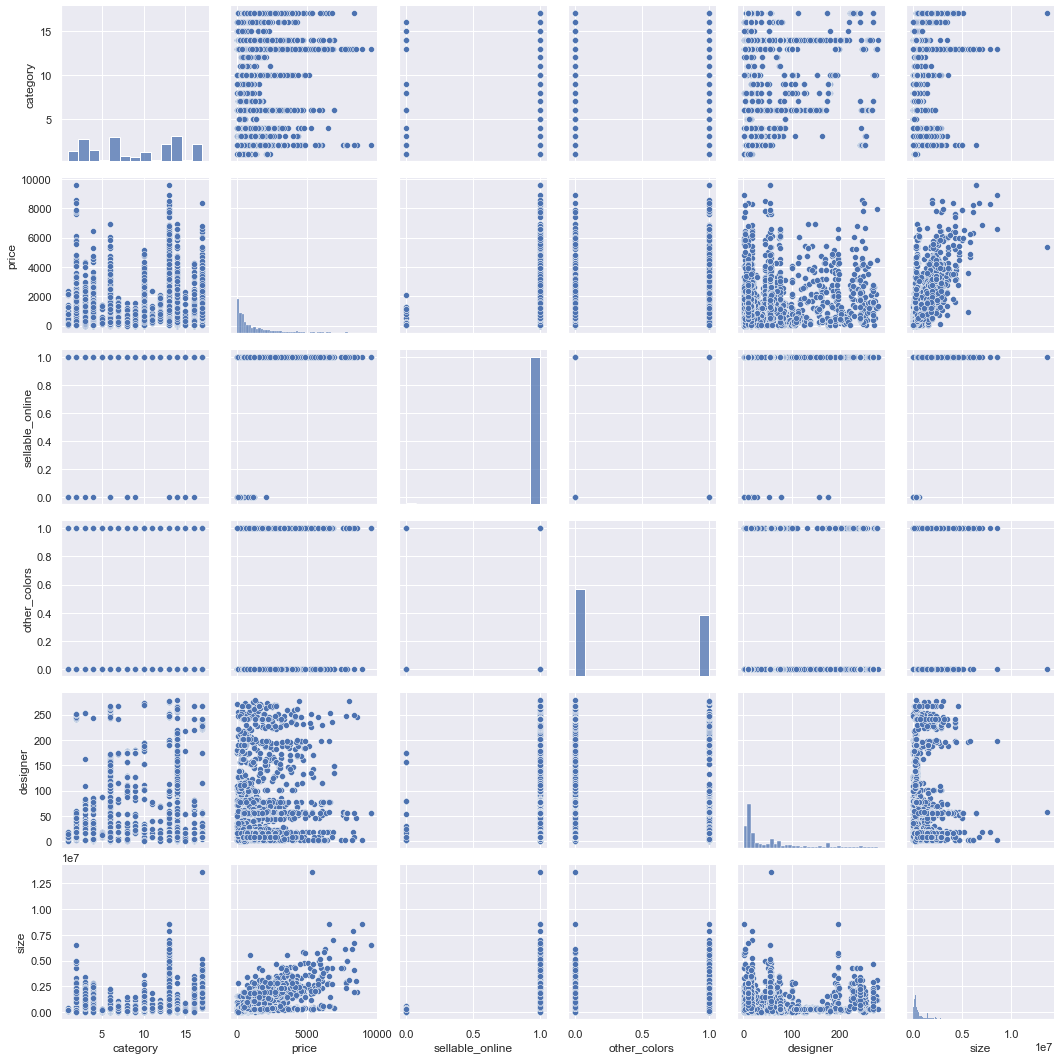

In [575]:
#оценим полученные значения на предмет позиитивной корреляции между двумя независимыми переменными
#позитивной корреляции на графике ниже не обнаружено

fg = plt.figure(figsize = (8,8))
sns.pairplot(df_6)

In [589]:
#первый метод машинного обучения - линейная регрессия

from sklearn.linear_model import LinearRegression

In [596]:
LinReg = LinearRegression()

In [530]:
from sklearn.model_selection import train_test_split

In [582]:
#переводим значения датафрейма в более удобнвй для модели вариант

df_7 = pd.get_dummies(df_6, drop_first = True)
df_7.sample(5)

,category,price,sellable_online,other_colors,designer,size
907,4,1355.0,1,1,30,277245.00
2316,13,75.0,1,1,44,1564099.78
2403,13,100.0,1,0,8,364026.33
2144,13,3590.0,1,1,196,5594368.00
3356,17,595.0,1,0,16,590400.00


In [583]:
#разбиваем наши данные на тестовый и тренировочные
#на треничровочных мы обучаем модель, когда на тестовых проверяем ее обобщающую способность 

X_train, X_test, y_train, y_test = train_test_split(df_7.drop('price', axis = 1), df_7['price'])

In [597]:
LinReg.fit(X_train, y_train)

LinearRegression()

In [598]:
LinReg.score(X_test, y_test)

0.45036370484346755

In [613]:
#так как показатель предыдущей модели не высок - пробуем другую

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, random_state=0)

In [614]:
regr.score(X_test, y_test)

0.7659285160469077

In [636]:
#показатель предыдущей модели намного более точный, однако пробуем еще метод ближайших соседей

lst = []

for value in range(1,31):
    neigh = KNeighborsRegressor(n_neighbors=value)
    neigh.fit(X_train, y_train)
    lst.append(neigh.score(X_test, y_test))

<AxesSubplot:>

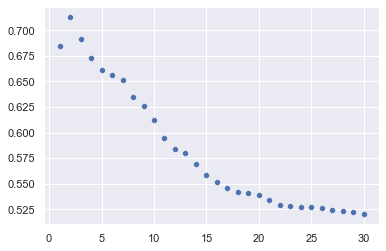

In [637]:
#строим график чтобы выбрать наиболее оптимальный вариант кол-ва соседей

sns.scatterplot(x = list(range(1,31)), y = lst)

In [638]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [639]:
neigh.score(X_test, y_test)

0.6912301389961102

# Вывод:

Наиболее точной моделью для предсказания цены на продукт оказалась RandomForestRegressor с показателем точности обобщающей способности - 0.7659285160469077